# Cluster Analysis Using K mean Algorithm

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
df = pd.read_csv("dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income\n(INR),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Removing CustomerID column.

In [3]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [5]:
#getting data insights
df.describe()

,Age,Annual Income\n(INR),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income
(INR)     200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


Data Visualisation.

1. Violin Plot

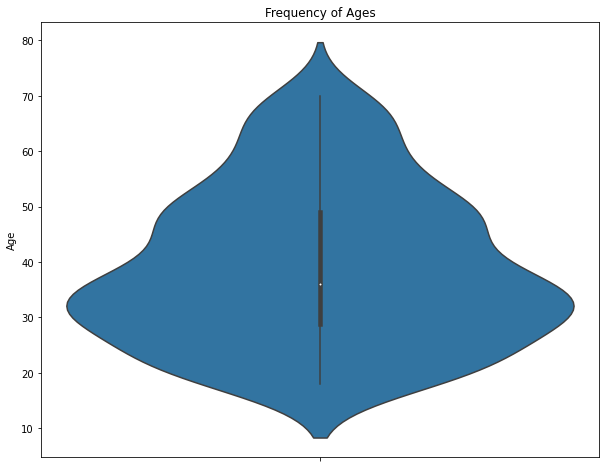

In [22]:
#Violin Plot for Age of customers
plt.figure(figsize=(10,8))
plt.title("Frequency of Ages")
sns.axes_style("whitegrid")
sns.violinplot(y=df["Age"])
plt.show()

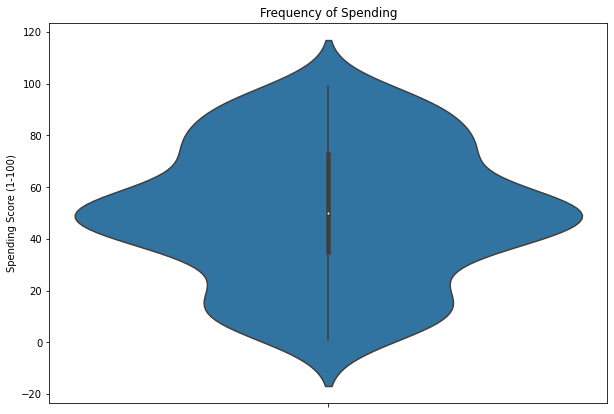

In [24]:
#Violin Plot for Spending of customers
plt.figure(figsize=(10,7))
plt.title("Frequency of Spending")
sns.axes_style("whitegrid")
sns.violinplot(y=df["Spending Score (1-100)"])
plt.show()

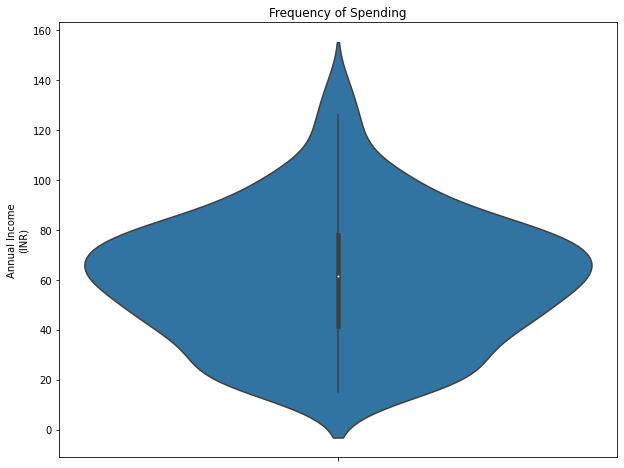

In [26]:
#Violin Plot for Annual Income of cusomers
plt.figure(figsize=(10,8))
plt.title("Frequency of Spending")
sns.axes_style("whitegrid")
sns.violinplot(y=df["Annual Income\n(INR)"])
plt.show()

2. Boxplot 

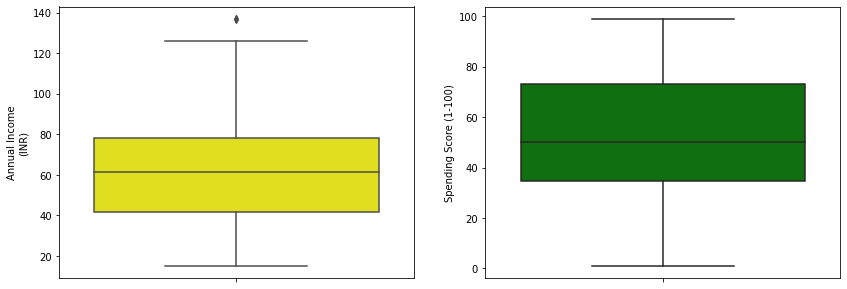

In [42]:
# Represnting the skewness of Annual Income and Spending Score using Box plot
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["Annual Income\n(INR)"], color="yellow")
plt.subplot(1,2,2)
sns.boxplot(y=df["Spending Score (1-100)"],color="green")

plt.show()

The middle line shows Median value and the outer lines how the outliers


3. Barplot

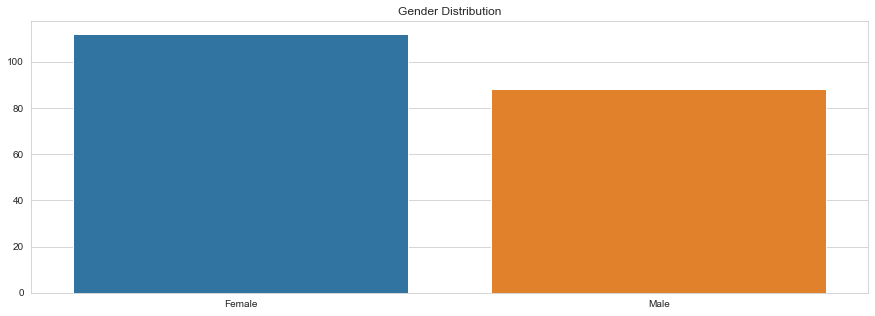

In [52]:
#Represing the Categroical datavalue Gender 
gender_c = df['Gender'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.title("Gender Distribution")
sns.barplot(x=gender_c.index, y=gender_c.values)
plt.show()

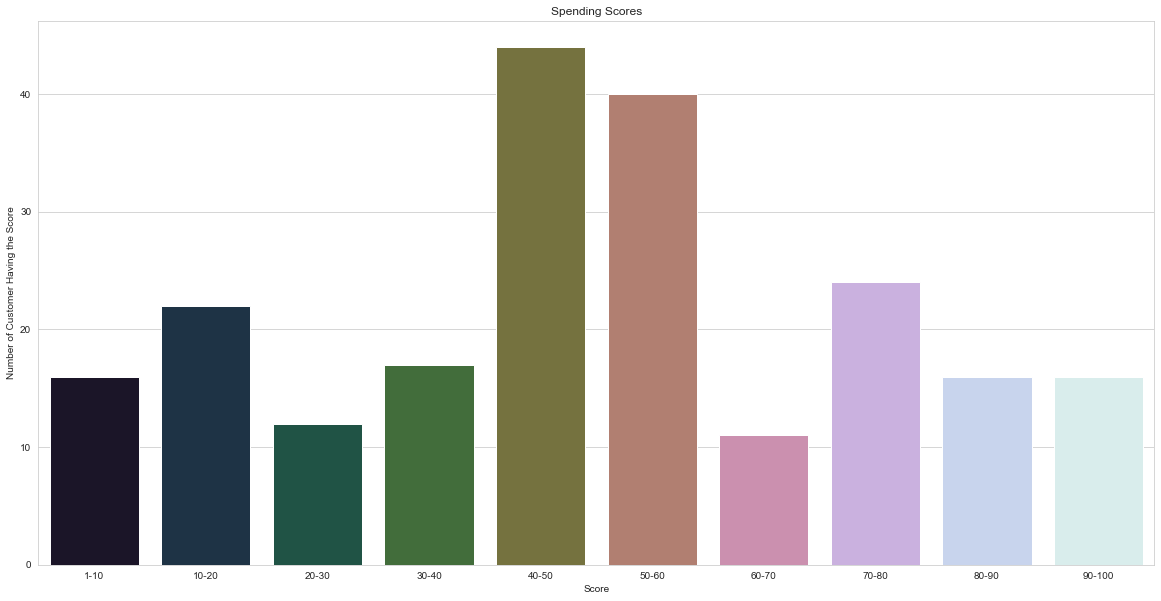

In [67]:
#Representing the distribution of Spending Score 
ss1_10 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 10)]
ss10_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 10) & (df["Spending Score (1-100)"] <= 20)]
ss20_30 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 20) & (df["Spending Score (1-100)"] <= 30)]
ss30_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 30) & (df["Spending Score (1-100)"] <= 40)]
ss40_50 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 40) & (df["Spending Score (1-100)"] <= 50)]
ss50_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 50) & (df["Spending Score (1-100)"] <= 60)]
ss60_70 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 60) & (df["Spending Score (1-100)"] <= 70)]
ss70_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 70) & (df["Spending Score (1-100)"] <= 80)]
ss80_90 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 80) & (df["Spending Score (1-100)"] <= 90)]
ss90_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 90) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"]
ssy = [len(ss1_10.values),len(ss10_20.values),len(ss20_30.values),len(ss30_40.values),len(ss40_50.values),len(ss50_60.values),len(ss60_70.values),len(ss70_80.values),len(ss80_90.values),len(ss90_100.values)]

plt.figure(figsize=(20,10))
sns.barplot(x=ssx, y=ssy, palette="cubehelix")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

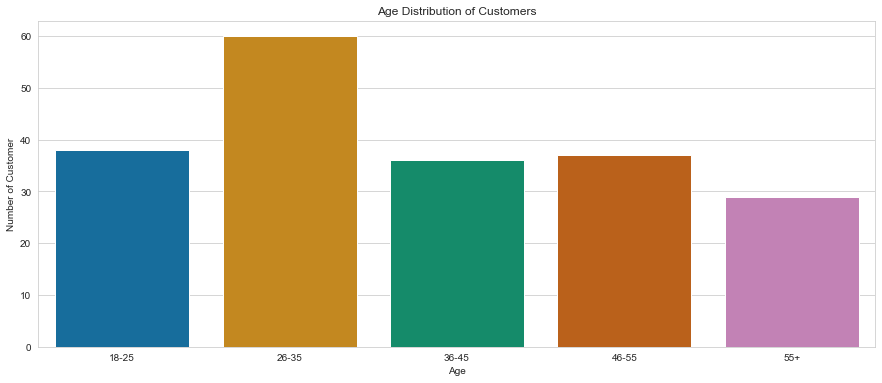

In [78]:
#Representing the Age Distribution

age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="colorblind")
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Now Implementing K mean Clsutering Algorithm

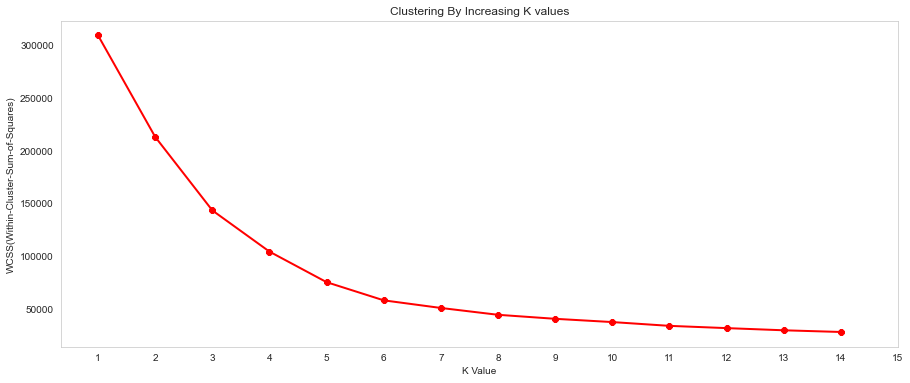

In [90]:
#importing Kmean from sklearn
from sklearn.cluster import KMeans
#Within-cluster sum of squares of distance from respective centeroids
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,6)) 

plt.grid()
plt.plot(range(1,15),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,16,1))
plt.ylabel("WCSS(Within-Cluster-Sum-of-Squares)")
plt.title("Clustering By Increasing K values")
plt.show()

Using the Elbow Curve optimum Number of clusters Observed are:6

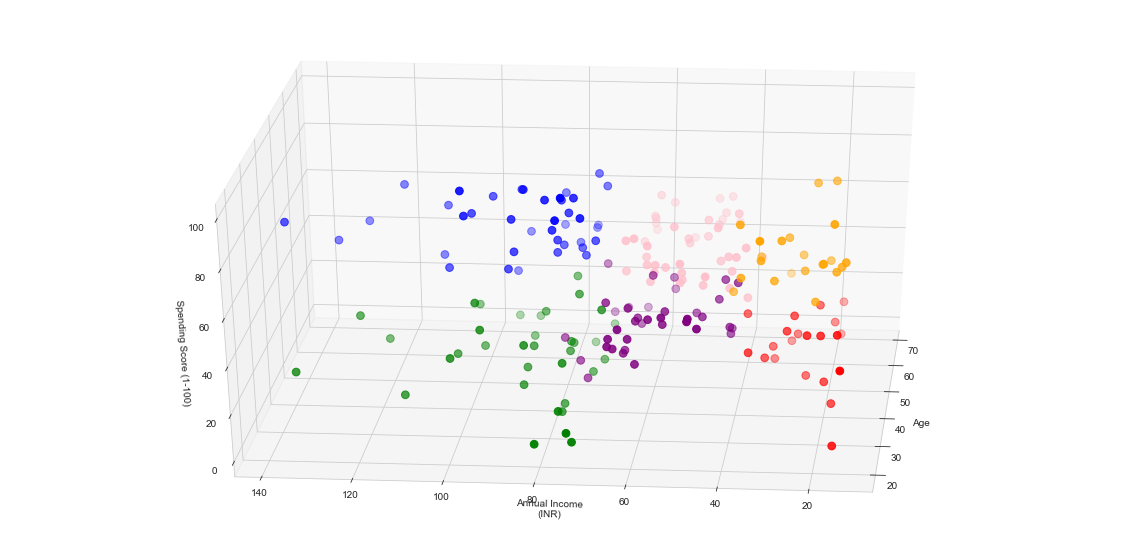

In [105]:
#3D representation of data and dividng in 6 clusters 
km = KMeans(n_clusters=6)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income\n(INR)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income\n(INR)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income\n(INR)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income\n(INR)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income\n(INR)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income\n(INR)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='pink', s=60)



ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income\n(INR)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Through K mean Cluster Analysis 6 clusters are divided